* **기후정보학및실습** HW3
조선아(2173112)

In [ ]:
!pip install cartopy
!pip install proplot
# proplot 설치 후 런타임 재실행이 필요할 수 있음

In [2]:
# 라이브러리 임포트

import pandas as pd
import numpy as np
import xarray as xr

import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point

import proplot as pplt  # 그림을 평행하게 배치하기 위한 라이브러리
pplt.rc['figure.facecolor'] = 'white'
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator

# 드라이브 마운트

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1) Read the following ASOS data from the CyberCampus and plot the temperature time series.
* SURFACE_ASOS_108_HR_1956_1956_2018.csv

In [3]:
df = pd.read_csv('/content/drive/MyDrive/2024 기후정보학및실습/ASOS_108/SURFACE_ASOS_108_HR_1956_1956_2018.csv' , encoding='cp949') # 한글 읽기 위한 encoding 지정 필요
df['일시'] = pd.to_datetime(df['일시']) # 문자인 '일시' 열을 pandas가 읽을 수 있는 datetime type로 변환
df.head(5)

,지점,일시,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),...,운형(운형약어),최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
0,108,1956-01-01 00:00:00,-8.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,108,1956-01-01 01:00:00,-7.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,108,1956-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-4.0,-2.0,0.1,0.6
3,108,1956-01-01 06:00:00,-8.9,NaN,0.8,340.0,60.0,1.9,NaN,1011.8,...,NaN,NaN,1000.0,NaN,NaN,-11.4,NaN,NaN,NaN,NaN
4,108,1956-01-01 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


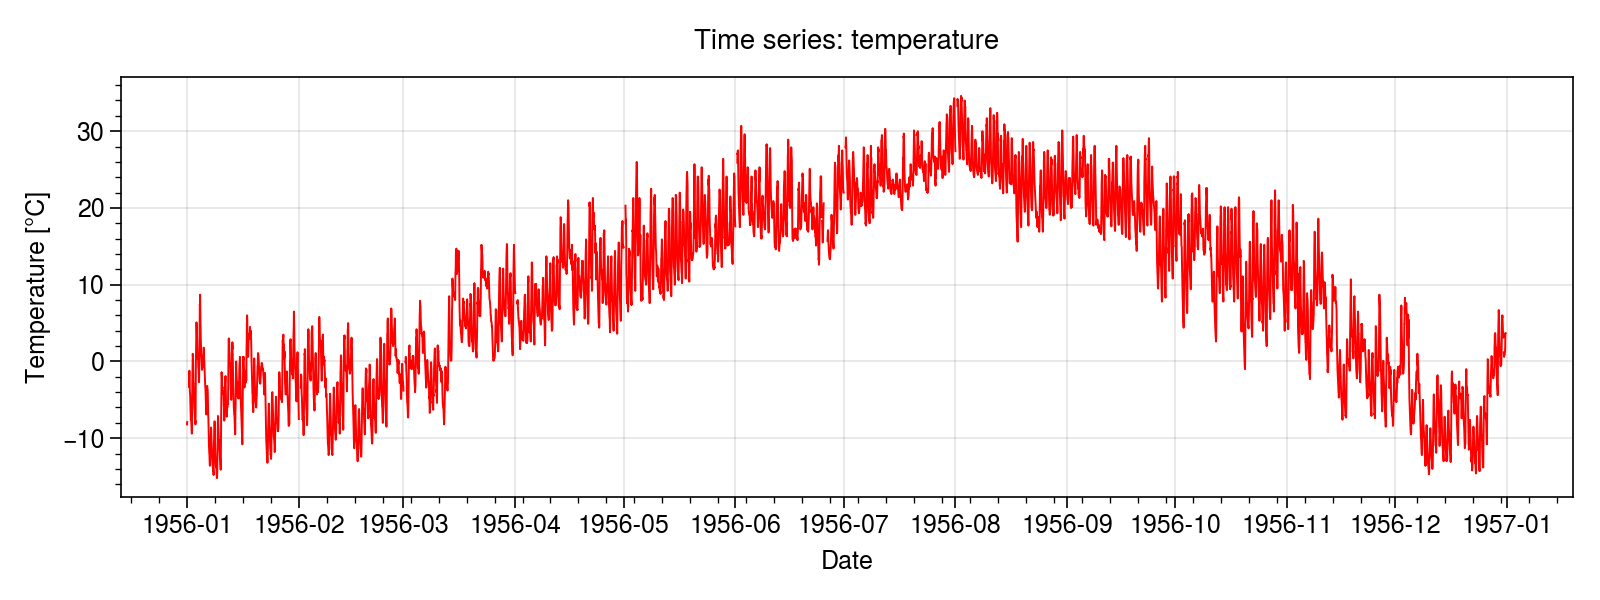

In [4]:
plt.figure(figsize=(8, 3))
plt.plot(df['일시'], df['기온(°C)'], linewidth=0.7, color='r') # temperature time series 출력
plt.xlabel('Date')
plt.ylabel('Temperature [°C]')
plt.title('Time series: temperature', pad=10)
plt.grid(True)
plt.gca().xaxis.set_major_locator(MonthLocator()) # 가로축에 각 월을 표시
plt.tight_layout()
plt.show()

2) Display the diurnal cycle in the temperature time series.

In [5]:
df['시간'] = df['일시'].dt.hour # '일시'로부터 시간을 추출하여 새로운 열을 생성
temp_mean = df.groupby('시간')['기온(°C)'].mean() # 동일 시간의 기온을 평균하여 diurnal cycle 생성
temp_mean

시간
0      8.630303
1      8.270950
2      8.016246
3      7.685994
4      7.399720
5      7.132493
6      7.029235
7      7.116527
8      7.881742
9      9.051261
10    10.499440
11    11.613165
12    12.623810
13    13.334066
14    13.828415
15    14.083791
16    13.935989
17    13.279121
18    12.368132
19    11.417308
20    10.595604
21    10.007967
22     9.510383
23     9.088462
Name: 기온(°C), dtype: float64

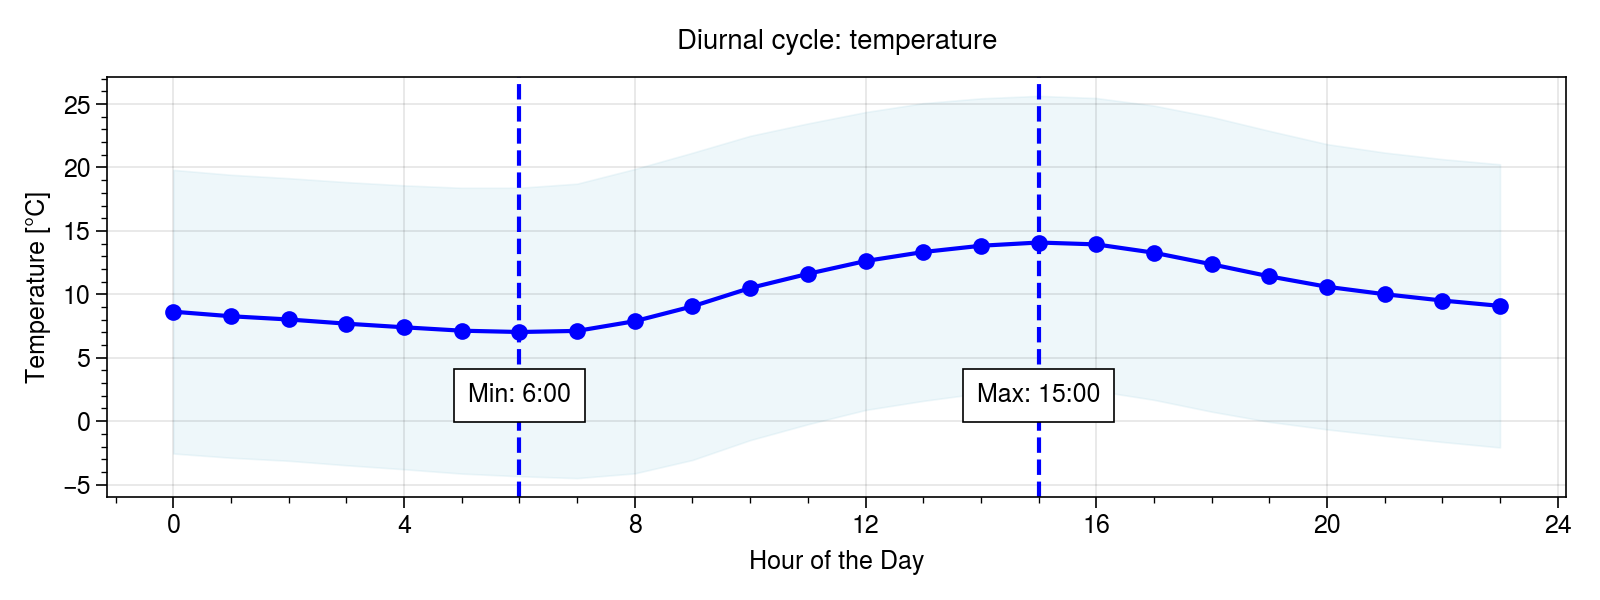

In [6]:
plt.figure(figsize=(8, 3))

idx_max = np.argmax(temp_mean)
idx_min = np.argmin(temp_mean)
plt.axvline(x=idx_max, linestyle='--', color='blue') # 최솟값 표시
plt.axvline(x=idx_min, linestyle='--', color='blue') # 최댓값 표시

plt.plot(temp_mean.index, temp_mean.values, color='blue', linestyle='-', marker='o', markersize=5) # diurnal cycle
temp_std = df.groupby('시간')['기온(°C)'].std()
plt.fill_between(temp_mean.index, temp_mean - temp_std, temp_mean + temp_std, color='lightblue', alpha=0.2) # errorbar (shaded)
plt.xticks(np.arange(0, 25, 4))
plt.xlabel('Hour of the Day')
plt.ylabel('Temperature [°C]')
plt.title('Diurnal cycle: temperature', pad=10)
plt.grid(True)

plt.text(idx_max, 1, f'Max: {idx_max}:00', ha='center', va='bottom', color='black', bbox=dict(facecolor='white', edgecolor='black', pad=5)) # 최솟값 표시
plt.text(idx_min, 1, f'Min: {idx_min}:00', ha='center', va='bottom', color='black', bbox=dict(facecolor='white', edgecolor='black', pad=5)) # 최댓값 표시

plt.tight_layout()
plt.show()

3) Based on 2), discuss how the temperature varies within a day.

* 1956년의 평균기온은 하루 중 해가 떠 있는 낮 시간에 높고, 밤 시간에 낮다.
* 평균기온이 가장 높은 시각은 15시, 가장 낮은 시각은 6시이다.
* 기온의 일변화 형태는 모든 계절에서 유사하나, 그 크기는 연중 크게 변한다.

4) Read the temperature in the following reanalysis data.
* air.2m.gauss.1979.nc

In [ ]:
da = xr.open_dataset('/content/drive/MyDrive/2024 기후정보학및실습/air.2m.gauss.1979.nc')['air'] # 파일 읽어오기

5) Calculate the time mean of the temperature and plot the map of time mean temperature.

In [8]:
da_mean = da.mean(dim='time') - 273.15 # time mean 구하기, °C 변환하기
da_mean

<xarray.DataArray 'air' (lat: 94, lon: 192)>
array([[-20.621277, -20.632202, -20.645111, ..., -20.583176, -20.594757,
        -20.60646 ],
       [-20.479614, -20.42778 , -20.376358, ..., -20.616608, -20.572067,
        -20.52565 ],
       [-19.91359 , -19.693085, -19.473862, ..., -20.531906, -20.33548 ,
        -20.12677 ],
       ...,
       [-48.10504 , -48.16487 , -48.158722, ..., -47.430542, -47.728058,
        -47.95117 ],
       [-49.328674, -49.52565 , -49.69391 , ..., -48.53392 , -48.825943,
        -49.09218 ],
       [-50.401733, -50.538025, -50.678146, ..., -49.990616, -50.129196,
        -50.2668  ]], dtype=float32)
Coordinates:
  * lat      (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon      (lon) float32 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1

/usr/local/lib/python3.10/dist-packages/cartopy/mpl/geoaxes.py:403: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


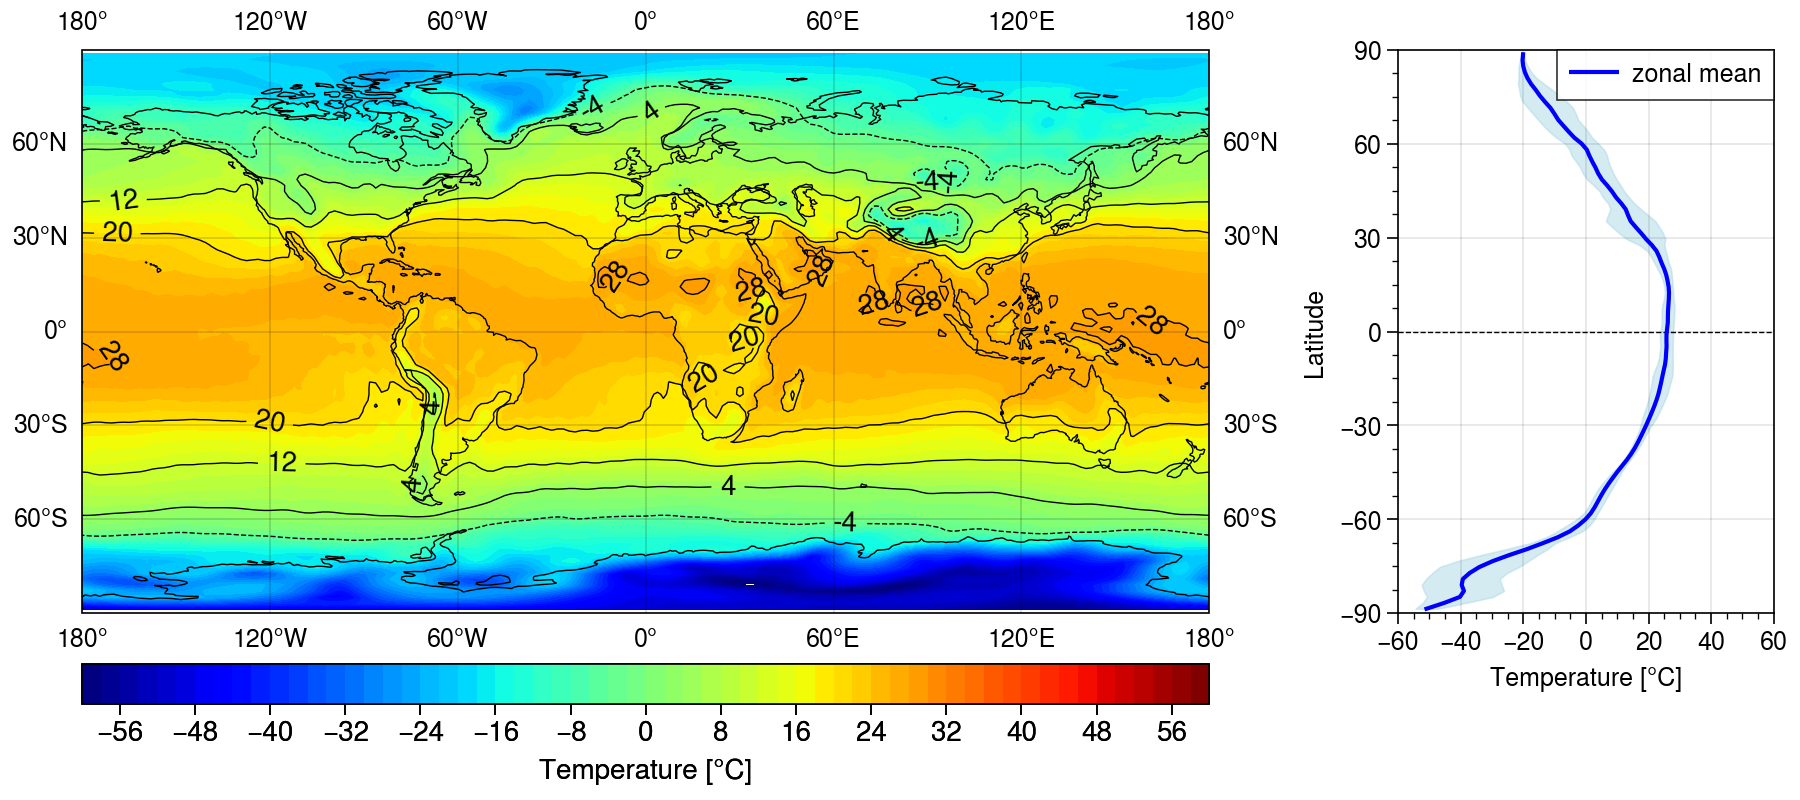

In [9]:
data, lon_mod = add_cyclic_point(da_mean.values, coord=da_mean.coords['lon']) # 그림을 그릴 때, 경도 0도선이 비지 않도록 채워 주는 함수 (optional)

fig, axs = pplt.subplots(nrows=1, ncols=2, projection={1:'cyl'}, width=9, width_ratios= [3, 1])

ax = axs[0] # 그림 1 (지도)
ax.coastlines(linewidth=0.5) # 해안선 그리기
ax.gridlines(draw_labels=True, linewidth=0.1, color='black', alpha=0.5, linestyle='--')
lon, lat = np.meshgrid(lon_mod, da_mean.lat.values)
plot1 = ax.contourf(lon, lat, data, cmap='jet', levels=np.linspace(-60, 60, 61)) # mean temperature 그리기
plot2 = ax.contour(lon, lat, data, colors='black', linewidths=0.5, levels=np.arange(-4, 29, 8)) # contour 그리기
contour_labels = plt.clabel(plot2, inline=True, fontsize=10, fmt='%1.0f') # contour label 붙이기
colorbar = ax.colorbar(plot1, loc='b', label='Temperature [°C]', labelsize=10) # colorbar 추가
colorbar.ax.tick_params(labelsize=10)

ax = axs[1] # 그림 2 (zonal mean)
ax.axhline(0, linestyle='--', color='k', linewidth=0.5)
mean_lat = da_mean.mean(dim='lon') # zonal mean 구하기
std_lat = da_mean.std(dim='lon')
ax.plot(mean_lat, da_mean.lat, color='blue', label='zonal mean') # zonal mean 그리기
ax.fill_betweenx(da_mean.lat, mean_lat - std_lat, mean_lat + std_lat, color='lightblue', alpha=0.5, label='')  # errorbar (shaded)
ax.set_xticks(np.arange(-60, 61, 20))
ax.set_yticks(np.arange(-90, 91, 30))
ax.invert_yaxis() # 그림 1과 축을 맞추기 위해 조정
ax.invert_xaxis()
ax.set_xlabel('Temperature [°C]')
ax.set_ylabel('Latitude')
ax.grid(True)
ax.legend()

plt.show()

6) Discuss about the meridional and zonal structure of time mean temperature.
* 1979년의 전지구 평균 2m 기온은 동일 위도대에서 서로 유사하나, 동일 경도에서는 크게 변화한다.
* 저위도에서 평균 기온이 높고, 고위도에서 평균 기온이 낮으며 그 차이는 약 40°C 이상이다.
* 저위도에서 남북 방향 온도 경도는 작은 반면, 중위도에서는 크다.